In [1]:
import numpy as np
import pandas as pd

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


#### Import DataFrame

In [2]:
rounds_df = pd.read_csv(r'C:\Users\krystynametcalf\Desktop\Rounds_df.csv')

In [3]:
rounds_df.head(3)

,company_name,company_category_list_x,company_market,company_country_code,company_state_code,company_city,funding_type_A,Round_A,funded_month_A,funded_quarter_A,...,funded_quarter_B,funded_year_B,raised_B,company_category_list,funding_type_C,Round_C,funded_month_C,funded_quarter_C,funded_year_C,raised_C
0,0-6.com,|Curated Web|,Curated Web,KM,KM,ZZ,venture,1,2008-03,2008-Q1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,PLYmedia,|Blogging Platforms|Media|Video|Advertising|,Blogging Platforms,USA,USA,Palo Alto,venture,1,2009-02,2009-Q1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,Pneuron,|Enterprise Software|,Enterprise Software,USA,USA,Nashua,venture,1,2011-11,2011-Q4,...,2013-Q1,2013.0,6000000.0,NaN,NaN,0,NaN,NaN,NaN,NaN


In [4]:
#Drop company_country_state columns
rounds_df = rounds_df.drop(['company_state_code', 'company_category_list_x'], axis=1)

### Begin Feature Engineering

In [5]:
rounds_df['company_country_code'].value_counts()

USA    7323
CHN     757
KM      712
GBR     452
DEU     254
       ... 
PER       1
GRC       1
SVN       1
GTM       1
BWA       1
Name: company_country_code, Length: 72, dtype: int64

#### Take the top four countries and replace with the rest with Other Country to reduce the number of dummy variables

In [6]:
rounds_df['company_country_code']=rounds_df['company_country_code'].apply(lambda x: x if (x =='USA') | (x == 'CHN') |
                                                              (x == 'GBR') | (x == 'DEU') else 'Other_Country')

In [7]:
rounds_df['company_country_code'].unique()

array(['Other_Country', 'USA', 'DEU', 'GBR', 'CHN'], dtype=object)

In [8]:
rounds_df.head(3)

,company_name,company_market,company_country_code,company_city,funding_type_A,Round_A,funded_month_A,funded_quarter_A,funded_year_A,raised_A,...,funded_quarter_B,funded_year_B,raised_B,company_category_list,funding_type_C,Round_C,funded_month_C,funded_quarter_C,funded_year_C,raised_C
0,0-6.com,Curated Web,Other_Country,ZZ,venture,1,2008-03,2008-Q1,2008.0,2000000.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,PLYmedia,Blogging Platforms,USA,Palo Alto,venture,1,2009-02,2009-Q1,2009.0,5000000.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,Pneuron,Enterprise Software,USA,Nashua,venture,1,2011-11,2011-Q4,2011.0,2000000.0,...,2013-Q1,2013.0,6000000.0,NaN,NaN,0,NaN,NaN,NaN,NaN


#### Take the top four cities and replace the rest with other city to reduce the number of dummy variables

In [9]:
rounds_df['company_city'].value_counts()

San Francisco    1038
ZZ                876
New York          701
Beijing           306
London            258
                 ... 
Gilman              1
Valby               1
Pessac              1
Moraga              1
Holliston           1
Name: company_city, Length: 1304, dtype: int64

In [10]:
rounds_df['company_city']=rounds_df['company_city'].apply(lambda x: x if (x =='San Francisco') | (x == 'New York') |
                                                              (x == 'Beijing') | (x == 'London') else 'Other_City')

In [11]:
rounds_df['company_city'].value_counts()

Other_City       9258
San Francisco    1038
New York          701
Beijing           306
London            258
Name: company_city, dtype: int64

#### Take the top four industries and replace with the rest with Other Industry to reduce the number of dummy variables

In [12]:
rounds_df['company_market'].value_counts()

Software                 1028
Biotechnology             917
Mobile                    546
E-Commerce                512
Enterprise Software       464
                         ... 
Real Estate Investors       1
Social Innovation           1
Service Providers           1
Proximity Internet          1
RFID                        1
Name: company_market, Length: 548, dtype: int64

In [13]:
rounds_df['company_market'].replace('', np.nan, inplace=True)

In [14]:
rounds_df['company_market']=rounds_df['company_market'].apply(lambda x: x if (x =='Software') | (x == 'Biotechnology') |
                                                              (x == 'Mobile') | (x == 'E-Commerce') | 
                                                              (x == 'Enterprise Software') else 'Other_Industry')

In [15]:
rounds_df.head(3)

,company_name,company_market,company_country_code,company_city,funding_type_A,Round_A,funded_month_A,funded_quarter_A,funded_year_A,raised_A,...,funded_quarter_B,funded_year_B,raised_B,company_category_list,funding_type_C,Round_C,funded_month_C,funded_quarter_C,funded_year_C,raised_C
0,0-6.com,Other_Industry,Other_Country,Other_City,venture,1,2008-03,2008-Q1,2008.0,2000000.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,PLYmedia,Other_Industry,USA,Other_City,venture,1,2009-02,2009-Q1,2009.0,5000000.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,Pneuron,Enterprise Software,USA,Other_City,venture,1,2011-11,2011-Q4,2011.0,2000000.0,...,2013-Q1,2013.0,6000000.0,NaN,NaN,0,NaN,NaN,NaN,NaN


In [16]:
rounds_df['company_market'].unique()

array(['Other_Industry', 'Enterprise Software', 'Mobile', 'Software',
       'E-Commerce', 'Biotechnology'], dtype=object)

#### Check funding types

In [17]:
rounds_df['funding_type_A'].value_counts()

venture        11550
seed              10
undisclosed        1
Name: funding_type_A, dtype: int64

In [18]:
rounds_df['funding_type_B'].value_counts()

venture    4283
Name: funding_type_B, dtype: int64

In [19]:
rounds_df['funding_type_C'].value_counts()

venture           1865
private_equity       1
Name: funding_type_C, dtype: int64

### Check for and remove Nan and Missing Values

In [20]:
rounds_df.head(3)

,company_name,company_market,company_country_code,company_city,funding_type_A,Round_A,funded_month_A,funded_quarter_A,funded_year_A,raised_A,...,funded_quarter_B,funded_year_B,raised_B,company_category_list,funding_type_C,Round_C,funded_month_C,funded_quarter_C,funded_year_C,raised_C
0,0-6.com,Other_Industry,Other_Country,Other_City,venture,1,2008-03,2008-Q1,2008.0,2000000.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,PLYmedia,Other_Industry,USA,Other_City,venture,1,2009-02,2009-Q1,2009.0,5000000.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,Pneuron,Enterprise Software,USA,Other_City,venture,1,2011-11,2011-Q4,2011.0,2000000.0,...,2013-Q1,2013.0,6000000.0,NaN,NaN,0,NaN,NaN,NaN,NaN


In [21]:
rounds_df.columns

Index(['company_name', 'company_market', 'company_country_code',
       'company_city', 'funding_type_A', 'Round_A', 'funded_month_A',
       'funded_quarter_A', 'funded_year_A', 'raised_A',
       'company_category_list_y', 'funding_type_B', 'Round_B',
       'funded_month_B', 'funded_quarter_B', 'funded_year_B', 'raised_B',
       'company_category_list', 'funding_type_C', 'Round_C', 'funded_month_C',
       'funded_quarter_C', 'funded_year_C', 'raised_C'],
      dtype='object')

In [22]:
#Drop company_country_state columns
rounds_df = rounds_df.drop(['company_category_list_y', 'funded_month_A', 'funded_quarter_A',
                            'funded_month_B', 'funded_quarter_B', 'company_category_list', 
                            'funded_month_C', 'funded_quarter_C'], axis=1)

In [23]:
rounds_df.columns

Index(['company_name', 'company_market', 'company_country_code',
       'company_city', 'funding_type_A', 'Round_A', 'funded_year_A',
       'raised_A', 'funding_type_B', 'Round_B', 'funded_year_B', 'raised_B',
       'funding_type_C', 'Round_C', 'funded_year_C', 'raised_C'],
      dtype='object')

In [24]:
rounds_df['company_name'].isnull().values.sum()

0

In [25]:
rounds_df['Round_A'].isnull().values.sum()

0

In [26]:
rounds_df['funded_year_A'].isnull().values.sum()

0

In [27]:
rounds_df['raised_A'].isnull().values.sum()

1393

In [28]:
rounds_df.raised_A.median()

4000000.0

In [29]:
rounds_df['raised_A']=rounds_df.raised_A.astype(object)

In [30]:
#Replace NA with Median Raised
rounds_df['raised_A'].fillna(rounds_df['raised_A'].median(), inplace=True)

In [31]:
rounds_df['raised_A'].isnull().values.sum()

0

In [32]:
rounds_df['funding_type_B'].isnull().values.sum()

7278

In [33]:
rounds_df['funding_type_B'].value_counts()

venture    4283
Name: funding_type_B, dtype: int64

In [34]:
rounds_df['funding_type_B']=rounds_df.funding_type_B.astype(object)

In [35]:
#Replace NA with Median Raised
rounds_df['funding_type_B'].fillna('None', inplace=True)

In [36]:
rounds_df['funding_type_B'].isnull().values.sum()

0

In [37]:
rounds_df['Round_B'].isnull().values.sum()

0

In [38]:
rounds_df['Round_B'].value_counts()

0    7278
1    4283
Name: Round_B, dtype: int64

In [39]:
rounds_df['funded_year_B'].isnull().values.sum()

7278

#### Make up fake year for companies that didn't get Round B funding

In [40]:
rounds_df['funded_year_B']=rounds_df.funded_year_B.astype(object)

In [41]:
#Replace NA with Fake Year- 2016 as data set ends in 2014
rounds_df['funded_year_B'].fillna(2016, inplace=True)

In [42]:
rounds_df['funded_year_B'].isnull().values.sum()

0

In [43]:
rounds_df.head(3)

,company_name,company_market,company_country_code,company_city,funding_type_A,Round_A,funded_year_A,raised_A,funding_type_B,Round_B,funded_year_B,raised_B,funding_type_C,Round_C,funded_year_C,raised_C
0,0-6.com,Other_Industry,Other_Country,Other_City,venture,1,2008.0,2000000.0,None,0,2016.0,NaN,NaN,0,NaN,NaN
1,PLYmedia,Other_Industry,USA,Other_City,venture,1,2009.0,5000000.0,None,0,2016.0,NaN,NaN,0,NaN,NaN
2,Pneuron,Enterprise Software,USA,Other_City,venture,1,2011.0,2000000.0,venture,1,2013.0,6000000.0,NaN,0,NaN,NaN


In [44]:
rounds_df['raised_B'].isnull().values.sum()

7561

In [45]:
rounds_df['raised_B'].value_counts()

10000000.0    328
15000000.0    185
5000000.0     165
8000000.0     161
12000000.0    160
             ... 
13200000.0      1
2528960.0       1
16000001.0      1
5320000.0       1
4690000.0       1
Name: raised_B, Length: 765, dtype: int64

In [46]:
rounds_df['raised_B']=rounds_df.raised_B.astype(object)

In [47]:
#Replace NA with Fake Year- 2016 as data set ends in 2014
rounds_df['raised_B'].fillna(0, inplace=True)

In [48]:
rounds_df['raised_B'].isnull().values.sum()

0

In [49]:
rounds_df['funding_type_C'].isnull().values.sum()

9695

In [50]:
rounds_df['funding_type_C'].value_counts()

venture           1865
private_equity       1
Name: funding_type_C, dtype: int64

In [51]:
rounds_df['funding_type_C']=rounds_df.funding_type_C.astype(object)

In [52]:
#Replace NA with Median Raised
rounds_df['funding_type_C'].fillna('None', inplace=True)

In [53]:
rounds_df['funding_type_C'].isnull().values.sum()

0

In [54]:
rounds_df['Round_C'].isnull().values.sum()

0

In [55]:
rounds_df['Round_C'].isnull().values.sum()

0

In [56]:
rounds_df['funded_year_C'].isnull().values.sum()

9695

In [57]:
rounds_df['funded_year_C']=rounds_df.funding_type_B.astype(object)

In [58]:
#Replace NA with Fake Year- 2017 as data set ends in 2014
rounds_df['funded_year_C'].fillna(2017, inplace=True)

In [59]:
rounds_df['funded_year_C'].isnull().values.sum()

0

In [60]:
rounds_df['raised_C'].isnull().values.sum()

9798

In [61]:
rounds_df['raised_C']=rounds_df.raised_B.astype(object)

In [62]:
#Replace NA with Fake Year- 2016 as data set ends in 2014
rounds_df['raised_C'].fillna(0, inplace=True)

In [63]:
rounds_df['raised_C'].isnull().values.sum()

0

### Create Dummy Variables

In [64]:
rounds_df = pd.get_dummies(rounds_df, columns=['company_country_code'], prefix='', prefix_sep='')

In [65]:
rounds_df = pd.get_dummies(rounds_df, columns=['company_market'], prefix='', prefix_sep='')

In [66]:
rounds_df = pd.get_dummies(rounds_df, columns=['company_city'], prefix='', prefix_sep='')

In [67]:
rounds_df = pd.get_dummies(rounds_df, columns=['funding_type_A'], prefix='', prefix_sep='')

In [68]:
rounds_df = pd.get_dummies(rounds_df, columns=['funding_type_B'], prefix='', prefix_sep='')

In [69]:
rounds_df = pd.get_dummies(rounds_df, columns=['funding_type_C'], prefix='', prefix_sep='')

In [70]:
rounds_df.head(3)

,company_name,Round_A,funded_year_A,raised_A,Round_B,funded_year_B,raised_B,Round_C,funded_year_C,raised_C,...,Other_City,San Francisco,seed,undisclosed,venture,None,venture,None,private_equity,venture
0,0-6.com,1,2008.0,2000000.0,0,2016.0,0.0,0,None,0.0,...,1,0,0,0,1,1,0,1,0,0
1,PLYmedia,1,2009.0,5000000.0,0,2016.0,0.0,0,None,0.0,...,1,0,0,0,1,1,0,1,0,0
2,Pneuron,1,2011.0,2000000.0,1,2013.0,6000000.0,0,venture,6000000.0,...,1,0,0,0,1,0,1,1,0,0


## Find Correlation and Other Vizzies

In [71]:
rounds_df.corr()

,Round_A,funded_year_A,raised_A,Round_B,funded_year_B,raised_B,Round_C,raised_C,CHN,DEU,...,Other_City,San Francisco,seed,undisclosed,venture,None,venture,None,private_equity,venture
Round_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_year_A,NaN,1.000000,0.007835,-0.309286,0.547102,-0.101459,-0.323758,-0.101459,-0.055688,0.022828,...,-0.035762,0.041077,0.027997,0.008573,-0.029282,0.309286,-0.309286,0.323758,-0.002494,-0.323765
raised_A,NaN,0.007835,1.000000,0.027889,-0.010308,0.226222,0.015410,0.226222,0.044052,-0.010910,...,-0.011016,-0.011945,-0.014774,0.029128,0.005301,-0.027889,0.027889,-0.015410,-0.001968,0.015463
Round_B,NaN,-0.309286,0.027889,1.000000,-0.828127,0.450380,0.481340,0.450380,0.034432,-0.033112,...,-0.064042,0.059805,-0.016479,-0.007135,0.017865,-1.000000,1.000000,-0.481340,0.012124,0.481137
funded_year_B,NaN,0.547102,-0.010308,-0.828127,1.000000,-0.335327,-0.552444,-0.335327,-0.055860,0.040886,...,0.027194,-0.020480,0.016079,0.005909,-0.017113,0.828127,-0.828127,0.552444,-0.007859,-0.552365
raised_B,NaN,-0.101459,0.226222,0.450380,-0.335327,1.000000,0.237450,1.000000,0.008944,-0.029504,...,-0.041591,0.058992,-0.007961,-0.003213,0.008560,-0.450380,0.450380,-0.237450,0.006544,0.237336
Round_C,NaN,-0.323758,0.015410,0.481340,-0.552444,0.237450,1.000000,0.237450,0.013132,-0.035280,...,-0.047849,0.052193,-0.012908,-0.004080,0.013539,-0.481340,0.481340,-1.000000,0.021200,0.999680
raised_C,NaN,-0.101459,0.226222,0.450380,-0.335327,1.000000,0.237450,1.000000,0.008944,-0.029504,...,-0.041591,0.058992,-0.007961,-0.003213,0.008560,-0.450380,0.450380,-0.237450,0.006544,0.237336
CHN,NaN,-0.055688,0.044052,0.034432,-0.055860,0.008944,0.013132,0.008944,1.000000,-0.039673,...,-0.135878,-0.083135,-0.007788,-0.002462,0.008169,-0.034432,0.034432,-0.013132,-0.002462,0.013197
DEU,NaN,0.022828,-0.010910,-0.033112,0.040886,-0.029504,-0.035280,-0.029504,-0.039673,1.000000,...,0.074754,-0.047073,-0.004410,-0.001394,0.004625,0.033112,-0.033112,0.035280,-0.001394,-0.035253


0    0.838595
1    0.161405
Name: Round_C, dtype: float64


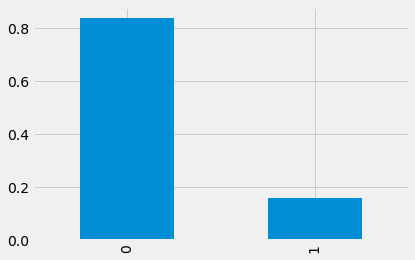

In [72]:
target_pcts = rounds_df.Round_C.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar');

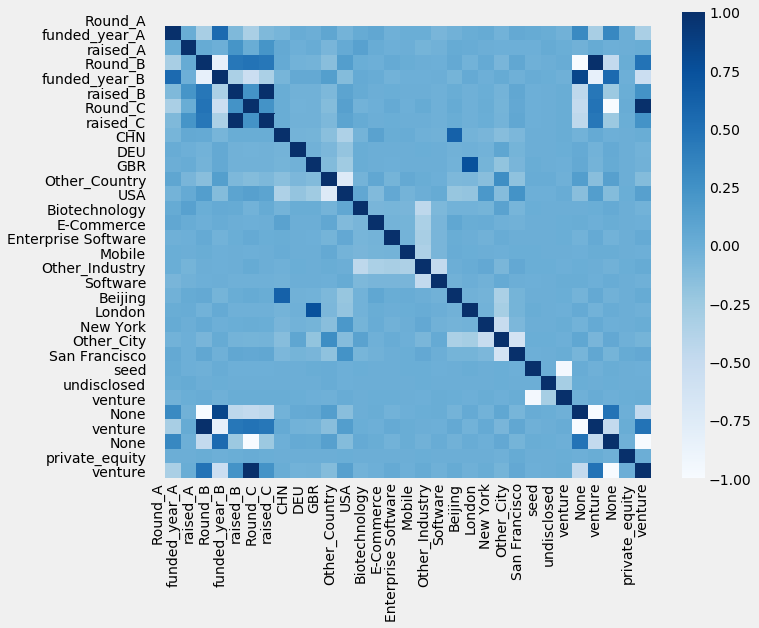

In [73]:
#Plot heatmap of feature correlation
plt.figure(figsize = (10,8))
sns.heatmap(rounds_df.corr(), cmap="Blues");

In [73]:
rounds_df.columns

Index(['company_name', 'Round_A', 'funded_year_A', 'raised_A', 'Round_B',
       'funded_year_B', 'raised_B', 'Round_C', 'funded_year_C', 'raised_C',
       'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
       'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry',
       'Software', 'Beijing', 'London', 'New York', 'Other_City',
       'San Francisco', 'seed', 'undisclosed', 'venture', 'None', 'venture',
       'None', 'private_equity', 'venture'],
      dtype='object')

In [74]:
xdf = rounds_df.drop('company_name',, axis=1)

SyntaxError: invalid syntax (<ipython-input-74-cedfe8cccda0>, line 1)

In [ ]:
#Pairplots of all the variables as scatterplots
sns.pairplot(rounds_df, hue='Round_C');

The correlation largely lies with a company receiving Round B funding

Look specifically at funding levels

In [75]:
rounds_df.columns

Index(['company_name', 'Round_A', 'funded_year_A', 'raised_A', 'Round_B',
       'funded_year_B', 'raised_B', 'Round_C', 'funded_year_C', 'raised_C',
       'CHN', 'DEU', 'GBR', 'Other_Country', 'USA', 'Biotechnology',
       'E-Commerce', 'Enterprise Software', 'Mobile', 'Other_Industry',
       'Software', 'Beijing', 'London', 'New York', 'Other_City',
       'San Francisco', 'seed', 'undisclosed', 'venture', 'None', 'venture',
       'None', 'private_equity', 'venture'],
      dtype='object')

### Binary Visualizations

#### Round A- Funding Year

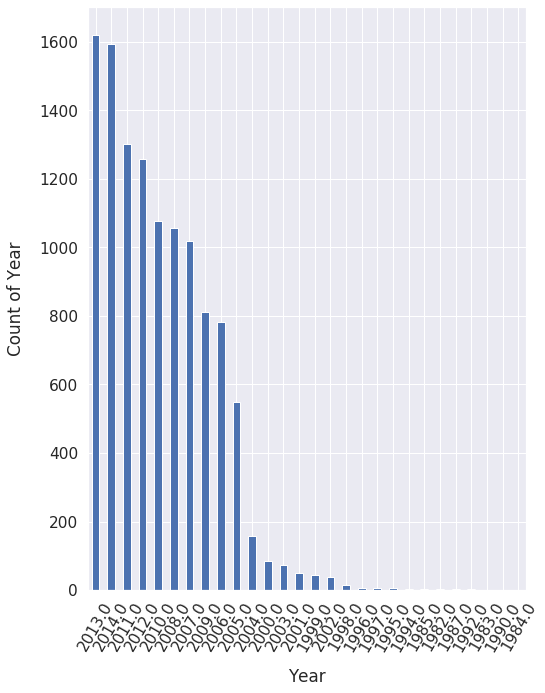

In [76]:
sns.set(font_scale=1.4)
rounds_df['funded_year_A'].value_counts().plot(kind='bar', figsize=(7, 10), rot=60)
plt.xlabel("Year", labelpad=14)
plt.ylabel("Count of Year", labelpad=14);


In [77]:
rounds_df['funded_year_A']=rounds_df['funded_year_A'].apply(lambda x: x if (x ==2013) | (x == 2014) | (x == 2012) |
                                                              (x == 2010) |(x == 2008) | (x == 2007)| (x == 2009) |
                                                              (x == 2006) | (x == 2005)| (x == 2004) else 'Other_YearA')

In [78]:
rounds_df.head(3)

,company_name,Round_A,funded_year_A,raised_A,Round_B,funded_year_B,raised_B,Round_C,funded_year_C,raised_C,...,Other_City,San Francisco,seed,undisclosed,venture,None,venture,None,private_equity,venture
0,0-6.com,1,2008,2000000.0,0,2016.0,0.0,0,None,0.0,...,1,0,0,0,1,1,0,1,0,0
1,PLYmedia,1,2009,5000000.0,0,2016.0,0.0,0,None,0.0,...,1,0,0,0,1,1,0,1,0,0
2,Pneuron,1,Other_YearA,2000000.0,1,2013.0,6000000.0,0,venture,6000000.0,...,1,0,0,0,1,0,1,1,0,0


In [79]:
rounds_df = pd.get_dummies(rounds_df, columns=['funded_year_A'], prefix='', prefix_sep='')

In [80]:
rounds_df.columns

Index(['company_name', 'Round_A', 'raised_A', 'Round_B', 'funded_year_B',
       'raised_B', 'Round_C', 'funded_year_C', 'raised_C', 'CHN', 'DEU', 'GBR',
       'Other_Country', 'USA', 'Biotechnology', 'E-Commerce',
       'Enterprise Software', 'Mobile', 'Other_Industry', 'Software',
       'Beijing', 'London', 'New York', 'Other_City', 'San Francisco', 'seed',
       'undisclosed', 'venture', 'None', 'venture', 'None', 'private_equity',
       'venture', '2004.0', '2005.0', '2006.0', '2007.0', '2008.0', '2009.0',
       '2010.0', '2012.0', '2013.0', '2014.0', 'Other_YearA'],
      dtype='object')

In [81]:
rounds_df = rounds_df.rename({'2004.0':'2004A', '2005.0':'2005A', '2006.0':'2006A', '2007.0':'2007A', 
                  '2008.0':'2008A', '2009.0':'2009A', '2010.0':'2010A', '2012.0': '2012A', '2013.0':
                  '2013A', '2014.0':'2014A', 'seed':'SeedA', 'undisclosed': 'UndisclosedA', 
                  'Venture':'VentureA', 'None':'NoneB', 'venture':'VentureB'}, axis='columns')

In [82]:
rounds_df.head(3)

,company_name,Round_A,raised_A,Round_B,funded_year_B,raised_B,Round_C,funded_year_C,raised_C,CHN,...,2005A,2006A,2007A,2008A,2009A,2010A,2012A,2013A,2014A,Other_YearA
0,0-6.com,1,2000000.0,0,2016.0,0.0,0,None,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,PLYmedia,1,5000000.0,0,2016.0,0.0,0,None,0.0,0,...,0,0,0,0,1,0,0,0,0,0
2,Pneuron,1,2000000.0,1,2013.0,6000000.0,0,venture,6000000.0,0,...,0,0,0,0,0,0,0,0,0,1


#### Round B- Funding Year

In [83]:
rounds_df.funded_year_B.value_counts()

2016.0    7278
2014.0     686
2013.0     603
2011.0     497
2008.0     467
2012.0     434
2010.0     419
2007.0     364
2009.0     344
2006.0     220
2005.0      84
2004.0      46
2002.0      26
2003.0      26
2001.0      23
2000.0      21
1999.0      13
1998.0       4
1997.0       2
1996.0       2
1995.0       2
Name: funded_year_B, dtype: int64

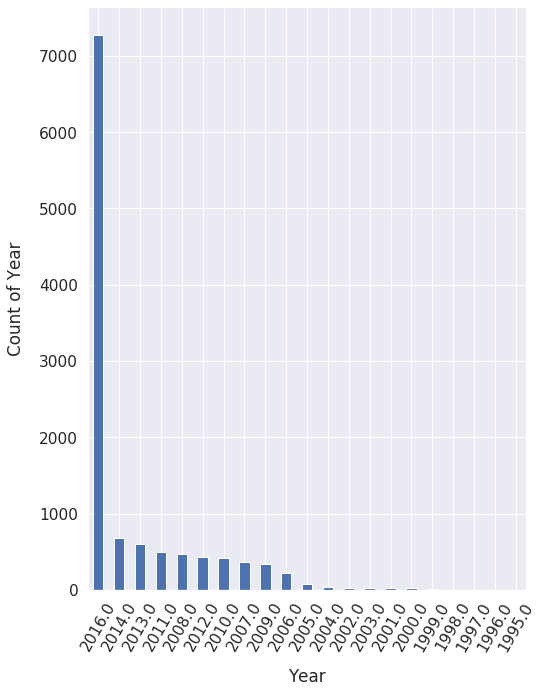

In [84]:
sns.set(font_scale=1.4)
rounds_df['funded_year_B'].value_counts().plot(kind='bar', figsize=(7, 10), rot=60)
plt.xlabel("Year", labelpad=14)
plt.ylabel("Count of Year", labelpad=14);


In [85]:
rounds_df.funded_year_B.value_counts()

2016.0    7278
2014.0     686
2013.0     603
2011.0     497
2008.0     467
2012.0     434
2010.0     419
2007.0     364
2009.0     344
2006.0     220
2005.0      84
2004.0      46
2002.0      26
2003.0      26
2001.0      23
2000.0      21
1999.0      13
1998.0       4
1997.0       2
1996.0       2
1995.0       2
Name: funded_year_B, dtype: int64

In [86]:
rounds_df['funded_year_B']=rounds_df['funded_year_B'].apply(lambda x: x if (x ==2014) | (x == 2011) | (x == 2013) |
                                                              (x == 2008) |(x == 2012) | (x == 2010)| (x == 2007) |
                                                              (x == 2009) | (x == 2006)| (x == 2005) else 'Other_YearB')

In [87]:
rounds_df = pd.get_dummies(rounds_df, columns=['funded_year_B'], prefix='', prefix_sep='')

In [88]:
rounds_df.columns

Index(['company_name', 'Round_A', 'raised_A', 'Round_B', 'raised_B', 'Round_C',
       'funded_year_C', 'raised_C', 'CHN', 'DEU', 'GBR', 'Other_Country',
       'USA', 'Biotechnology', 'E-Commerce', 'Enterprise Software', 'Mobile',
       'Other_Industry', 'Software', 'Beijing', 'London', 'New York',
       'Other_City', 'San Francisco', 'SeedA', 'UndisclosedA', 'VentureB',
       'NoneB', 'VentureB', 'NoneB', 'private_equity', 'VentureB', '2004A',
       '2005A', '2006A', '2007A', '2008A', '2009A', '2010A', '2012A', '2013A',
       '2014A', 'Other_YearA', '2005.0', '2006.0', '2007.0', '2008.0',
       '2009.0', '2010.0', '2011.0', '2012.0', '2013.0', '2014.0',
       'Other_YearB'],
      dtype='object')

In [89]:
rounds_df = rounds_df.rename({'2005.0':'2005B', '2006.0':'2006B', '2007.0':'2007B', '2008.0':'2008B', 
                  '2009.0':'2009B', '2010.0':'2010B', '2011.0': '2011B', '2012.0':
                  '2012B', '2013.0':'2013B', '2014.0':'2014B'}, axis='columns')

In [90]:
rounds_df.columns

Index(['company_name', 'Round_A', 'raised_A', 'Round_B', 'raised_B', 'Round_C',
       'funded_year_C', 'raised_C', 'CHN', 'DEU', 'GBR', 'Other_Country',
       'USA', 'Biotechnology', 'E-Commerce', 'Enterprise Software', 'Mobile',
       'Other_Industry', 'Software', 'Beijing', 'London', 'New York',
       'Other_City', 'San Francisco', 'SeedA', 'UndisclosedA', 'VentureB',
       'NoneB', 'VentureB', 'NoneB', 'private_equity', 'VentureB', '2004A',
       '2005A', '2006A', '2007A', '2008A', '2009A', '2010A', '2012A', '2013A',
       '2014A', 'Other_YearA', '2005B', '2006B', '2007B', '2008B', '2009B',
       '2010B', '2011B', '2012B', '2013B', '2014B', 'Other_YearB'],
      dtype='object')

In [91]:
rounds_df.dtypes

company_name            object
Round_A                  int64
raised_A               float64
Round_B                  int64
raised_B               float64
Round_C                  int64
funded_year_C           object
raised_C               float64
CHN                      uint8
DEU                      uint8
GBR                      uint8
Other_Country            uint8
USA                      uint8
Biotechnology            uint8
E-Commerce               uint8
Enterprise Software      uint8
Mobile                   uint8
Other_Industry           uint8
Software                 uint8
Beijing                  uint8
London                   uint8
New York                 uint8
Other_City               uint8
San Francisco            uint8
SeedA                    uint8
UndisclosedA             uint8
VentureB                 uint8
NoneB                    uint8
VentureB                 uint8
NoneB                    uint8
private_equity           uint8
VentureB                 uint8
2004A   

In [92]:
del rounds_df['funded_year_C']

In [93]:
# check the distribution
rounds_df['Round_C'].value_counts()/rounds_df.shape[0]

0    0.838595
1    0.161405
Name: Round_C, dtype: float64

In [ ]:
# scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=rounds_df, x=’x1',y=’x2',hue=’y’)

## Simple Logistic Regression Model 

In [95]:
rounds_df.columns

Index(['company_name', 'Round_A', 'raised_A', 'Round_B', 'raised_B', 'Round_C',
       'raised_C', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA',
       'Biotechnology', 'E-Commerce', 'Enterprise Software', 'Mobile',
       'Other_Industry', 'Software', 'Beijing', 'London', 'New York',
       'Other_City', 'San Francisco', 'SeedA', 'UndisclosedA', 'VentureB',
       'NoneB', 'VentureB', 'NoneB', 'private_equity', 'VentureB', '2004A',
       '2005A', '2006A', '2007A', '2008A', '2009A', '2010A', '2012A', '2013A',
       '2014A', 'Other_YearA', '2005B', '2006B', '2007B', '2008B', '2009B',
       '2010B', '2011B', '2012B', '2013B', '2014B', 'Other_YearB'],
      dtype='object')

In [96]:
rounds_df.head(3)

,company_name,Round_A,raised_A,Round_B,raised_B,Round_C,raised_C,CHN,DEU,GBR,...,2006B,2007B,2008B,2009B,2010B,2011B,2012B,2013B,2014B,Other_YearB
0,0-6.com,1,2000000.0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,PLYmedia,1,5000000.0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Pneuron,1,2000000.0,1,6000000.0,0,6000000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
rounds_df.columns

Index(['company_name', 'Round_A', 'raised_A', 'Round_B', 'raised_B', 'Round_C',
       'raised_C', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA',
       'Biotechnology', 'E-Commerce', 'Enterprise Software', 'Mobile',
       'Other_Industry', 'Software', 'Beijing', 'London', 'New York',
       'Other_City', 'San Francisco', 'SeedA', 'UndisclosedA', 'VentureB',
       'NoneB', 'VentureB', 'NoneB', 'private_equity', 'VentureB', '2004A',
       '2005A', '2006A', '2007A', '2008A', '2009A', '2010A', '2012A', '2013A',
       '2014A', 'Other_YearA', '2005B', '2006B', '2007B', '2008B', '2009B',
       '2010B', '2011B', '2012B', '2013B', '2014B', 'Other_YearB'],
      dtype='object')

In [98]:
funding_df = rounds_df.drop(['company_name'], axis=1)



In [99]:
funding_df.head(3)

,Round_A,raised_A,Round_B,raised_B,Round_C,raised_C,CHN,DEU,GBR,Other_Country,...,2006B,2007B,2008B,2009B,2010B,2011B,2012B,2013B,2014B,Other_YearB
0,1,2000000.0,0,0.0,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,5000000.0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,2000000.0,1,6000000.0,0,6000000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

# split dataset into x,y
x = funding_df.drop('Round_C', axis=1)
y = funding_df['Round_C']


# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

Round_C
0    9695
1    1866
dtype: int64


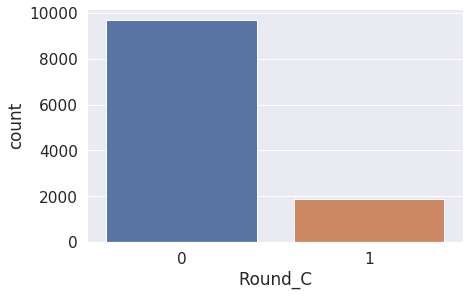

In [101]:
import seaborn as sns

print(funding_df.groupby('Round_C').size())

sns.countplot(x="Round_C", data=funding_df);

In [102]:
# define model
lr = LogisticRegression(random_state=13, class_weight=None)
# fit it
lr.fit(X_train,y_train)
# test
y_pred = lr.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy Score: 0.8175266647448832
Confusion Matrix: 
[[2758  161]
 [ 472   78]]
Area Under Curve: 0.5433311532592109
Recall score: 0.14181818181818182
Precision score: 0.3263598326359833
F1 score: 0.19771863117870722


In [287]:
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={1 : 4, 0 : 1}, solver='liblinear')

lr_balanced.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1])))

lr_4x.fit(X_train, y_train)
print('4:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test)), roc_auc_score(y_test, lr_4x.predict_proba(X_test)[:,1])))

Balanced class weights Logistic Regression Test F1: 0.517, Test AUC: 0.799
4:1 class weights Logistic Regression Test F1: 0.478, Test AUC: 0.797


Logistic Regression Model best F1 score 0.293 at prob decision threshold >= 0.261


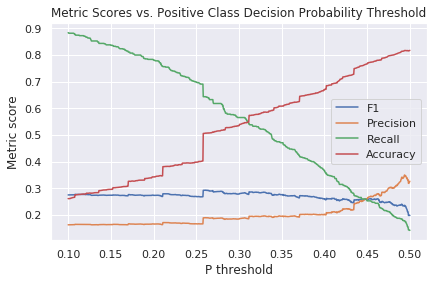

In [104]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'])
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

### Random Forest

In [108]:
X = funding_df.drop('Round_C', axis=1)
y = funding_df['Round_C']

In [109]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [110]:
from sklearn import tree

# Set some parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [111]:
dtrmodel.tree_

In [115]:
# Root Mean Square Error (compared to 34427 for linear regression without OQ2, 29882 with OQ2)
np.sqrt(np.mean((tree_pred_test - y_test)**2))

0.0

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
#Initialize the model, then fit it on the training data
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [119]:
rf1_test_pred = rfmodel1.predict(X_test)

In [122]:
# Root Mean Square Error (compared to 34427 for linear regression without OQ2, 29882 with OQ2)
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

0.055020024815053165

In [123]:
rfmodel2=RandomForestRegressor(n_estimators = 1000, min_samples_leaf=1,  n_jobs=-1, max_features=4, min_impurity_split=300000) #Your parameters inside the parentheses
rfmodel2.fit(X_train,y_train)

/home/kmetcalf8/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/kmetcalf8/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/kmetcalf8/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/kmetcalf8/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=300000, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [124]:
rf2_test_pred = rfmodel2.predict(X_test)

In [125]:
np.sqrt(np.mean((rf2_test_pred - y_test)**2))

0.36713116580941113

In [ ]:
rfmodel2.max_features


In [127]:
rfmodel3=RandomForestRegressor(n_estimators = 600, min_samples_leaf=1,  n_jobs=-1, max_features='sqrt') #Your parameters inside the parentheses
rfmodel3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [128]:
rf3_test_pred = rfmodel3.predict(X_test)

In [129]:
np.sqrt(np.mean((rf3_test_pred - y_test)**2))

0.010980559706029307

### Random Forest  for Feature Selection

In [130]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [134]:
rounds_df.columns

Index(['company_name', 'Round_A', 'raised_A', 'Round_B', 'raised_B', 'Round_C',
       'raised_C', 'CHN', 'DEU', 'GBR', 'Other_Country', 'USA',
       'Biotechnology', 'E-Commerce', 'Enterprise Software', 'Mobile',
       'Other_Industry', 'Software', 'Beijing', 'London', 'New York',
       'Other_City', 'San Francisco', 'SeedA', 'UndisclosedA', 'VentureB',
       'NoneB', 'VentureB', 'NoneB', 'private_equity', 'VentureB', '2004A',
       '2005A', '2006A', '2007A', '2008A', '2009A', '2010A', '2012A', '2013A',
       '2014A', 'Other_YearA', '2005B', '2006B', '2007B', '2008B', '2009B',
       '2010B', '2011B', '2012B', '2013B', '2014B', 'Other_YearB'],
      dtype='object')

In [139]:
# Create a list of feature names
feat_labels = ['Round_A', 'raised_A', 'Round_B', 'raised_B','CHN', 'DEU', 'GBR', 'Other_Country', 'USA',
       'Biotechnology', 'E-Commerce', 'Enterprise Software', 'Mobile',
       'Other_Industry', 'Software', 'Beijing', 'London', 'New York',
       'Other_City', 'San Francisco', 'SeedA', 'UndisclosedA', 'VentureB',
       'NoneB', 'VentureB', 'NoneB', 'private_equity', 'VentureB', '2004A',
       '2005A', '2006A', '2007A', '2008A', '2009A', '2010A', '2012A', '2013A',
       '2014A', 'Other_YearA', '2005B', '2006B', '2007B', '2008B', '2009B',
       '2010B', '2011B', '2012B', '2013B', '2014B', 'Other_YearB']

In [140]:
X = funding_df.drop('Round_C', axis=1)
y = funding_df['Round_C']

In [141]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [142]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Round_A', 0.0)
('raised_A', 0.003982146302090179)
('Round_B', 0.029924697326409445)
('raised_B', 0.023762574336595663)
('CHN', 0.023498214281441682)
('DEU', 0.00036976591353588884)
('GBR', 0.00010405917852467481)
('Other_Country', 0.00017273990036268958)
('USA', 0.000724736694466057)
('Biotechnology', 0.0010947152402839846)
('E-Commerce', 0.0004272044308554001)
('Enterprise Software', 0.00023595438779266137)
('Mobile', 0.000357749008052307)
('Other_Industry', 0.00027287883676377405)
('Software', 0.0006140487501553536)
('Beijing', 0.00037795344529775157)
('London', 0.0002788850865711184)
('New York', 8.754254815028263e-05)
('Other_City', 0.0002145762334953245)
('San Francisco', 0.00044924923858835695)
('SeedA', 0.00044069617613272404)
('UndisclosedA', 1.4394569456886949e-06)
('VentureB', 1.2346278088604338e-08)
('NoneB', 2.0698283323774963e-06)
('VentureB', 0.0309046124950015)
('NoneB', 0.029685621864343707)
('private_equity', 0.4077160067129913)
('VentureB', 0.00017704997930887502)
(

In [143]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.02)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,

In [144]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Round_B
raised_B
CHN
VentureB
NoneB
private_equity
2004A


In [145]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [146]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [147]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

1.0

In [148]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

1.0

### KNN

In [152]:
X = funding_df.drop('Round_C', axis=1)
y = funding_df['Round_C']

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)


print(metrics.accuracy_score(y, y_pred))

0.9160107257157686


In [155]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [156]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [157]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.849945945945946


In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.84874676 0.85121107 0.86937716 0.85726644 0.86764706 0.8416955
 0.85640138 0.85726644 0.84602076 0.8633218 ]


In [160]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.8558954371315867


In [161]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8602195751451223, 0.8621218668971478, 0.857885430342761, 0.8578844583743305, 0.8558954371315867, 0.8579708887978397, 0.8546846635344361, 0.853733031674208, 0.8506196672578229, 0.8531282430100516, 0.848889937285606, 0.8476787898544439, 0.8486304217146718, 0.8468999440744318, 0.8480245863152825, 0.8467267093934019, 0.8458622556247066, 0.8479379315913664, 0.8462945572758567, 0.8458616574902876, 0.8449969794211853, 0.8471587867441451, 0.8454295053727424, 0.8468998693076296, 0.8480240629476661, 0.8469866735651503, 0.8465538485463838, 0.847764771677139, 0.8470727301546475, 0.8476786403208392]


Text(0, 0.5, 'Cross-Validated Accuracy')

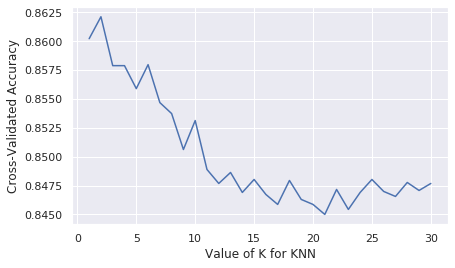

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

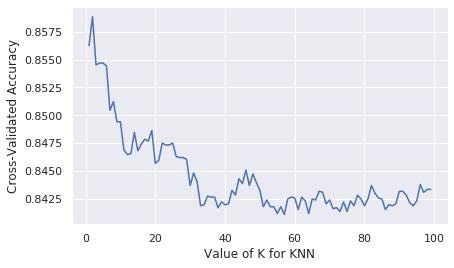

In [163]:
# Another cool viz 
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, scoring='accuracy')
    k_scores.append(scores.mean())
#print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [164]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8458616574902876


In [165]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.8269203105513903


In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
# define the parameter values that should be searched
k_range = list(range(1, 100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [168]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [169]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [170]:
# fit the grid with data
grid.fit(X, y);

In [171]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.12061861, 0.121733  , 0.12089112, 0.12051883, 0.12244372,
        0.12187324, 0.12182872, 0.12123122, 0.12210848, 0.13016264,
        0.13278444, 0.1215131 , 0.11983125, 0.11999304, 0.11979928,
        0.11904397, 0.11928353, 0.12009714, 0.11971474, 0.12177916,
        0.12064843, 0.12018189, 0.12036543, 0.11970875, 0.12247469,
        0.12128515, 0.12268646, 0.12227869, 0.12850771, 0.13230181,
        0.12701731, 0.13019509, 0.12787488, 0.12287791, 0.12272117,
        0.1223166 , 0.12249322, 0.12099071, 0.1205934 , 0.12487662,
        0.13111744, 0.13000576, 0.12523623, 0.12796435, 0.12645049,
        0.12219362, 0.12318931, 0.12803128, 0.12695174, 0.12266276,
        0.12428727, 0.12195942, 0.12246547, 0.12098124, 0.12103369,
        0.12156322, 0.12009461, 0.12061455, 0.12069445, 0.12133186,
        0.12092154, 0.12116773, 0.12095768, 0.12080934, 0.1204108 ,
        0.11975296, 0.12039649, 0.12008812, 0.12250836, 0.12536936,
        0.1246907 , 0.12360041,

In [172]:
# examine the best model
def get_best_model(model_grid):
    best_k = model_grid.cv_results_['rank_test_score'][0]
    print (best_k, model_grid.cv_results_['mean_test_score'][best_k], model_grid.cv_results_['std_test_score'][best_k])

get_best_model(grid)

2 0.857885430342761 0.010269141634217665


In [173]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [174]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [175]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=20, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [176]:
# view the complete results
grid.cv_results_

{'mean_fit_time': array([0.11890585, 0.12121475, 0.12345898, 0.12430501, 0.12288253,
        0.12031963, 0.12498362, 0.12268298, 0.12154679, 0.12018476,
        0.12175894, 0.12016504, 0.12087376, 0.12212903, 0.12397749,
        0.11965714, 0.12097046, 0.11965094, 0.11951952, 0.11995788,
        0.11975155, 0.12174459, 0.12298763, 0.12216609, 0.12257361,
        0.12287574, 0.12360632, 0.13473363, 0.11903172, 0.12017531,
        0.11956272, 0.11876297, 0.11950037, 0.11786656, 0.11916096,
        0.11851802, 0.12054234, 0.12063401, 0.12111015, 0.12045512,
        0.12198808, 0.12239435, 0.12286189, 0.12056162, 0.11913726,
        0.12142634, 0.11929212, 0.11989517, 0.12136834, 0.11949673,
        0.11909118, 0.11928623, 0.11964476, 0.11866598, 0.11874671,
        0.11838689, 0.11833851, 0.11837788, 0.11857836, 0.11936009]),
 'std_fit_time': array([0.00132803, 0.00253464, 0.00238582, 0.00165642, 0.00328571,
        0.00224459, 0.00210225, 0.00250183, 0.00244127, 0.00152001,
        0.001

In [178]:
# examine the best model
get_best_model(grid)

3 0.8607386062869908 0.009657225694424901


### Classification

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [182]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [183]:
X = funding_df.drop('Round_C', axis=1)
y = funding_df['Round_C']

In [184]:
X_train, X_test, label_train, label_test = train_test_split(X, y, \
                                                            test_size=0.3, random_state=41)

In [185]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, label_test)))

The score for kNN is
Training:  90.90%
Test set:  85.07%


In [186]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

The score for logistic regression is
Training:  82.64%
Test set:  83.02%


In [188]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(label_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[2724  169]
 [ 349  227]]


### Reduce Features

In [197]:
few_df = rounds_df[['Round_B', 'raised_B', 'CHN', 'VentureB', 'NoneB', 'private_equity', '2004A', 'Round_C']]

In [198]:
few_df.head(3)

,Round_B,raised_B,CHN,VentureB,VentureB,VentureB,NoneB,NoneB,private_equity,2004A,Round_C
0,0,0.0,0,1,0,0,1,1,0,0,0
1,0,0.0,0,1,0,0,1,1,0,0,0
2,1,6000000.0,0,1,1,0,0,1,0,0,0


In [199]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

# split dataset into x,y
x = few_df.drop('Round_C', axis=1)
y = few_df['Round_C']


# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [200]:
# define model
lr = LogisticRegression(random_state=13, class_weight=None)
# fit it
lr.fit(X_train,y_train)
# test
y_pred = lr.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8414528682617469
Confusion Matrix: 
[[2919    0]
 [ 550    0]]
Area Under Curve: 0.5
Recall score: 0.0


In [201]:
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={1 : 4, 0 : 1}, solver='liblinear')

lr_balanced.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_balanced.predict(X_test)), roc_auc_score(y_test, lr_balanced.predict_proba(X_test)[:,1])))

lr_4x.fit(X_train, y_train)
print('4:1 class weights Logistic Regression Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_4x.predict(X_test)), roc_auc_score(y_test, lr_4x.predict_proba(X_test)[:,1])))

Balanced class weights Logistic Regression Test F1: 0.547, Test AUC: 0.862
4:1 class weights Logistic Regression Test F1: 0.547, Test AUC: 0.862


/home/kmetcalf8/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model best F1 score 0.274 at prob decision threshold >= 0.317


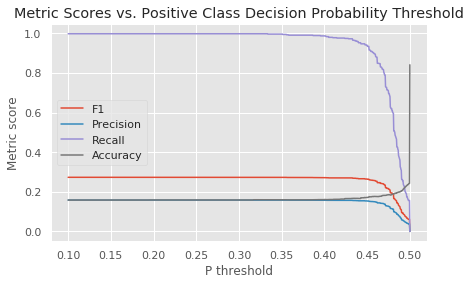

In [202]:
X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = lr.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(y_val, model_val_labels))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'])
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

In [288]:
rounds_df.to_csv(r'C:\Users\krystynametcalf\Desktop\funds_df.csv', index=False) 